In [64]:
import pandas as pd
from prepare import *
from read_data import *
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\604572\Continuum\anaconda3\envs\dsb2019\lib\imp.py:343: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return _load(spec)


Reading train.csv file....


KeyboardInterrupt: 

In [23]:
#train = pd.read_csv('reduce_train.csv')
#test = pd.read_csv('reduce_test.csv')
train = pd.read_csv('data/train.csv')

In [24]:
train.shape, test.shape

((11341042, 11), (1000, 891))

In [75]:
keep_ids = train[train.type=='Assessment'][['installation_id']].drop_duplicates()
keep_ids.installation_id

2185        0006a69f
6881        0006c192
8038        00129856
10069       001d0ed0
11440       00225f67
              ...   
11324601    ff9715db
11329022    ffc90c32
11333366    ffd2871d
11335801    ffe3b25d
11337165    ffeb0b1b
Name: installation_id, Length: 4242, dtype: object

In [97]:
#train.groupby('installation_id') \
#    .count()['event_id'].values'

train_grouped = train.groupby('installation_id')['event_id'].count()

In [128]:
bad_ids = train_grouped[train_grouped>6000]

keep_count_ids = train_grouped[train_grouped<6000]
bad_ids

installation_id
00fc65b6     6776
0429e1ff     6933
04a5927d    11316
04e2712b     6695
05047409     9768
            ...  
f9bfec85     8926
fa14af61     9000
fa342fde     6676
fbea5f61     7228
fc30ec02     6241
Name: event_id, Length: 277, dtype: int64

In [126]:
from tqdm import tqdm
tqdm.pandas()

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


In [127]:
train_copy['installation_id'].progress_apply(lambda x:x)

100%|█████████████████████████████████████████████████████| 7206378/7206378 [00:06<00:00, 1185383.99it/s]


0           0001e90f
1           0001e90f
2           0001e90f
3           0001e90f
4           0001e90f
              ...   
11341037    fffc0583
11341038    fffc0583
11341039    fffc0583
11341040    fffc0583
11341041    fffc0583
Name: installation_id, Length: 7206378, dtype: object

In [114]:
keep_count_ids

installation_id
0001e90f    1357
000447c4     181
0006a69f    3801
0006c192    2224
0009a5a9     412
            ... 
fff64664     779
fff70c1e      44
fff744ce       3
fff944d5     173
fffc0583     251
Name: event_id, Length: 16443, dtype: int64

In [116]:
train_copy = train.copy()
train_copy.shape

(11341042, 11)

In [119]:
train_copy = train_copy[train_copy.installation_id.isin(keep_count_ids.index)]
train_copy.shape

(7206378, 11)

In [122]:
keep_count_ids.shape

(16443,)

In [112]:
train_labels = pd.read_csv('data/train_labels.csv')

len(set(train_labels.installation_id).intersection(set(bad_ids.index)))

505

In [113]:
train_labels.shape

(17690, 7)

In [ ]:
data_df = train.copy()
data_df = data_df[data_df.world != 'NONE']

# Filter out only the installation ids with assessments
keep_id = data_df[data_df.type == "Assessment"][['installation_id']].drop_duplicates()
data_df = pd.merge(data_df, keep_id, on="installation_id", how="inner")

# Filter out installation IDs with unreasonable event code counts (2 stdvs above mean)
df_grouped = data_df.groupby('installation_id')['event_id'].count()
keep_count_ids = df_grouped
keep_count_id = data_df[data_df.type == "Assessment"][['installation_id']].drop_duplicates()


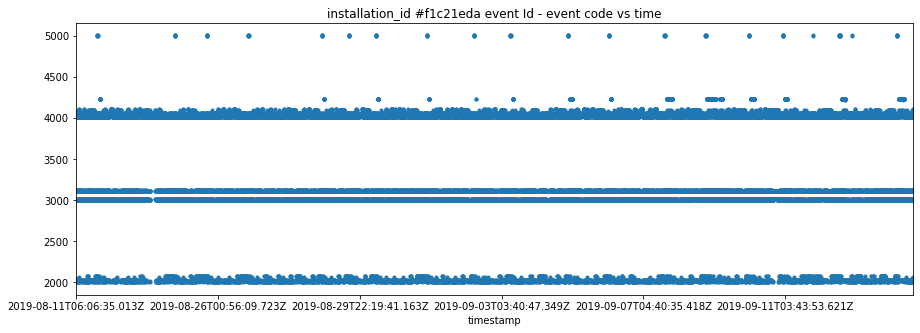

In [69]:
train.query('installation_id == "f1c21eda"') \
    .set_index('timestamp')['event_code'] \
    .plot(figsize=(15, 5),
          title='installation_id #f1c21eda event Id - event code vs time',
         style='.',
         )
plt.show()